__Trabajo Practico Final 
Hernán Martínez Rivero__   

Consigna
Aprendizaje supervisado y no supervisado.
Utilizando los datos de vinos obtenidos del siguiente dataset:
from sklearn.datasets import load_wine
1) Construya 2 datasets, uno con los datos originales y otro con los datos
correctamente escalados y/o normalizados. Divida ambos datasets en conjuntos
de entrenamiento y de validación.
2) Elija un valor de K y aplique el algoritmo de KNN en ambos datasets. Evalúe la
precisión en ambos casos.
3) Elija un valor de max_depth y aplique el algoritmo de Árboles de Decisión en
ambos datasets. Evalúe la precisión en ambos casos.
4) Tome los datos escalados y/o normalizados, reduzca la dimensión del problema
a 2 utilizando PCA y grafique el conjunto resultante.
5) Sin utilizar las etiquetas del dataset, elija un valor de K y aplique el algoritmo de
KMeans sobre los datos transformados por PCA. Repita el procedimiento
utilizando KMeans por mini-batches

__Desarrollo del ejercicio__

# __Antecedentes__

In [365]:
from sklearn.datasets import load_wine
import pandas as pd
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier


from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
import os
from sklearn.tree import plot_tree
import pydotplus
from IPython.display import Image


import mglearn
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from sklearn import metrics

# __Punto 1__

# __Dataset Original__

In [366]:

# Cargar el conjunto de datos de vinos
wine_data = load_wine()

# Crear un DataFrame de pandas con los datos originales
wine_df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)

# Agregar la columna de la etiqueta (clase) al DataFrame
wine_df['target'] = wine_data.target

# Dividir el conjunto de datos en entrenamiento y validación
X_train, X_valid, y_train, y_valid = train_test_split(
    wine_df.drop('target', axis=1),  # Características
    wine_df['target'],  # Etiquetas
    test_size=0.2,  # Porcentaje de datos para validación
    random_state=42  # Semilla para reproducibilidad
)

# Mostrar información sobre las formas de los conjuntos
print("Forma del conjunto de entrenamiento:", X_train.shape, y_train.shape)
print("Forma del conjunto de validación:", X_valid.shape, y_valid.shape)

# Mostrar las primeras filas del DataFrame resultante
print(wine_df.head())

# Guardar los conjuntos de entrenamiento y validación en archivos CSV
X_train.to_csv('train_data.csv', index=False)
y_train.to_csv('train_labels.csv', index=False)
X_valid.to_csv('valid_data.csv', index=False)
y_valid.to_csv('valid_labels.csv', index=False)

# Guardar el DataFrame en un archivo CSV si es necesario
wine_df.to_csv('wine_dataset.csv', index=False)

Forma del conjunto de entrenamiento: (142, 13) (142,)
Forma del conjunto de validación: (36, 13) (36,)
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39    

# __Dataset Normalizado__

In [367]:
# Cargar el conjunto de datos de vinos para luego Normalizar
#wine_data = load_wine()

# Crear un DataFrame de pandas con los datos originales
#wine_df = pd.DataFrame(data=wine_data.data, columns=wine_data.feature_names)

# Escalar y normalizar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(wine_df)


# Crear un nuevo DataFrame con los datos escalados
scaled_df = pd.DataFrame(data=scaled_data, columns=wine_df.columns)

# Agregar la columna de la etiqueta (clase) al DataFrame escalado
scaled_df['target'] = wine_data.target

# Dividir el conjunto de datos en entrenamiento y validación
X_train1, X_valid1, y_train1, y_valid1 = train_test_split(
    scaled_df.drop('target', axis=1),  # Características
    scaled_df['target'],  # Etiquetas
    test_size=0.2,  # Porcentaje de datos para validación
    random_state=42  # Semilla para reproducibilidad
)

# Mostrar información sobre las formas de los conjuntos
print("Forma del conjunto de entrenamiento:", X_train1.shape, y_train1.shape)
print("Forma del conjunto de validación:", X_valid1.shape, y_valid1.shape)

# Mostrar las primeras filas del DataFrame escalado
print(scaled_df.head())

# Guardar los conjuntos de entrenamiento y validación en archivos CSV
X_train1.to_csv('train_data1.csv', index=False)
y_train1.to_csv('train_labels1.csv', index=False)
X_valid1.to_csv('valid_data1.csv', index=False)
y_valid1.to_csv('valid_labels1.csv', index=False)

# Guardar el DataFrame escalado en un archivo CSV si es necesario
scaled_df.to_csv('scaled_wine_dataset.csv', index=False)


Forma del conjunto de entrenamiento: (142, 13) (142,)
Forma del conjunto de validación: (36, 13) (36,)
    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   color_intensity       hue  od280/od315_of_diluted_wines   prolin

# __Punto 2__

In [368]:
# K-NN Clasificación


# Cargar el conjunto de datos de vinos
# la linea 
# wine_data = load_wine()
# carga el data frame

#definimos el nunmero de vecinos cercanos
n_neighbors = 65



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

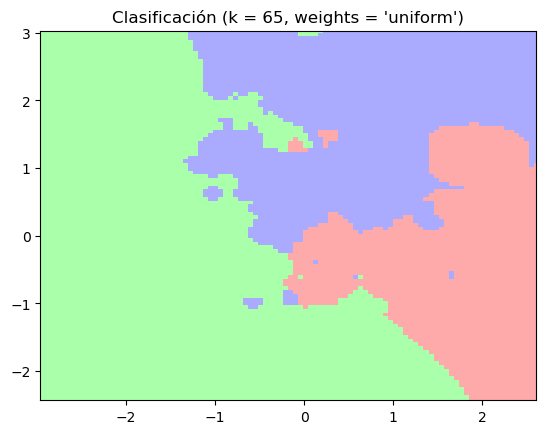

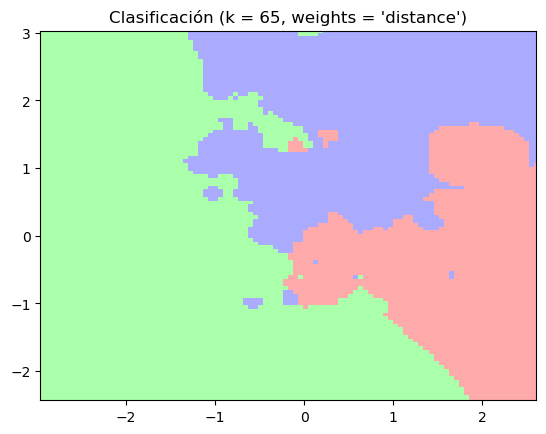

Precisión del modelo: 0.8333333333333334


In [369]:
# Cargar el conjunto de datos de Entrenamiento del archivo original
wine_dataset_csv = pd.read_csv('wine_dataset.csv')

#mostrar la info del archivo
wine_dataset_csv.info()

# Mostrar las columnas del DataFrame
print(wine_dataset_csv.columns)

# Acceder a los datos y las etiquetas
vinos = wine_dataset_csv.drop('target', axis=1)
etiquetas = wine_dataset_csv['target']

# Imprimir algunas filas para verificar
print(vinos.head())
print(etiquetas.head())
print("---------------------")
#X = vinos.iloc[:, :2]
#y = etiquetas
#y = y.astype(int)
#X
#y

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(vinos, etiquetas, test_size=0.2, random_state=42)



h = .02
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # Creamos una instancia del clasificador de vecinos más cercanos y le pasamos los datos mediante fit().
    # El primer párametro de KNeighborsClassifier es con cuántos vecinos quiero clasificar
    # y el segundo el tipo de peso a utilizar.
    #clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf = KNeighborsClassifier(n_neighbors= n_neighbors, weights='uniform')
    #clf.fit(X, y)
    clf.fit(X_train, y_train)
    # Establecemos los límites del gráfico y asignamos un color a cada punto de malla.
    #x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    #y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    #xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    predicciones = clf.predict(X_test)
    # Agregamos el resultado al gráfico
    #Z = Z.reshape(xx.shape)
    # Calcular la precisión
    precision = accuracy_score(y_test, predicciones)
    
    
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Ploteo los datos de entrenamiento
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Clasificación (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.show()
print("Precisión del modelo:", precision)

C:\Users\herna\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\herna\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


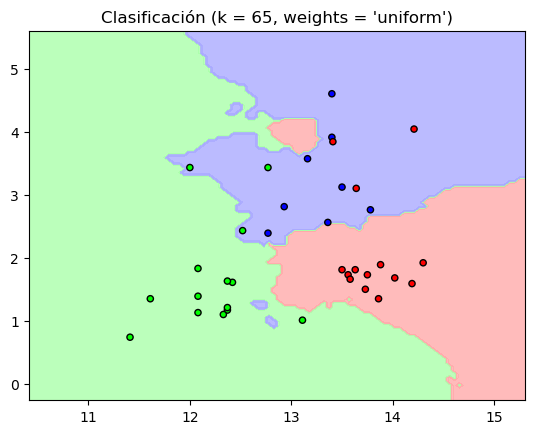

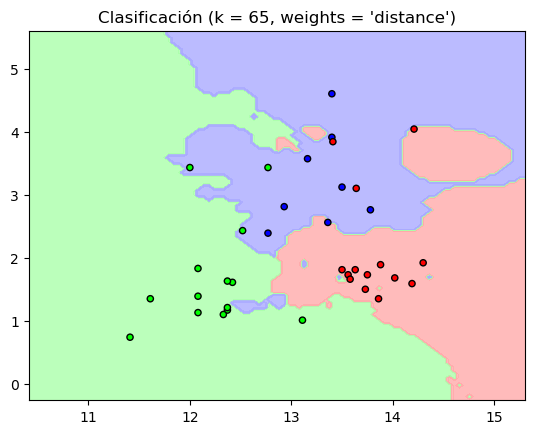

Precisión en datos de validación: 0.8333333333333334
Precisión en datos de prueba: 0.8333333333333334


In [370]:
# Cargar el conjunto de datos de Validación del archivo original

for weights in ['uniform', 'distance']:
    clf = KNeighborsClassifier(n_neighbors=5, weights=weights)
    clf.fit(X_train.iloc[:, :2], y_train)

    # Establecer los límites del gráfico y asignar un color a cada punto de malla.
    x_min, x_max = X_valid.iloc[:, 0].min() - 1, X_valid.iloc[:, 0].max() + 1
    y_min, y_max = X_valid.iloc[:, 1].min() - 1, X_valid.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Crear un conjunto de puntos de malla para las dos primeras características
    mesh_points = np.c_[xx.ravel(), yy.ravel()]

    # Utilizar solo las dos primeras características para hacer las predicciones
    predicciones_valid = clf.predict(X_valid.iloc[:, :2])

    # Calcular la precisión en los datos de validación
    precision_valid = accuracy_score(y_valid, predicciones_valid)

    # Realizar predicciones en los datos de prueba
    predicciones_test = clf.predict(X_test.iloc[:, :2])

    # Calcular la precisión en los datos de prueba
    precision_test = accuracy_score(y_test, predicciones_test)

    # Agregar el resultado al gráfico utilizando scatter
    plt.figure()
    Z = clf.predict(mesh_points)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

    # Ploteo los datos de validación
    plt.scatter(X_valid.iloc[:, 0], X_valid.iloc[:, 1], c=y_valid, cmap=cmap_bold, edgecolor='k', s=20)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Clasificación (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.show()
print("Precisión en datos de validación:", precision_valid)
print("Precisión en datos de prueba:", precision_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

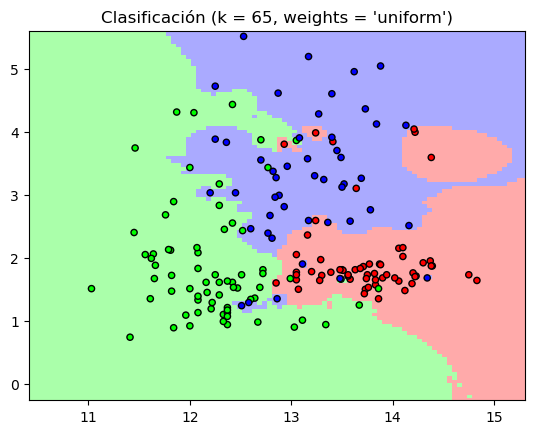

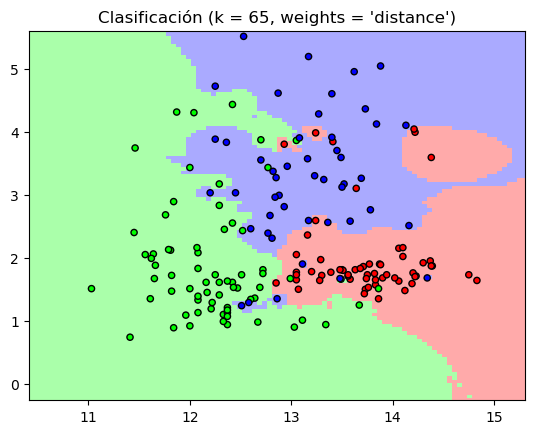

Precisión del modelo normalizado: 0.3888888888888889


In [371]:
# Cargar el conjunto de datos de Entrenamiento del archivo Normalizado
wine_dataset_scaled_csv = pd.read_csv('scaled_wine_dataset.csv')

#mostrar la info del archivo
wine_dataset_scaled_csv.info()

# Mostrar las columnas del DataFrame
print(wine_dataset_scaled_csv.columns)

# Acceder a los datos y las etiquetas
vinos1 = wine_dataset_scaled_csv.drop('target', axis=1)
etiquetas1 = wine_dataset_scaled_csv['target']

# Imprimir algunas filas para verificar
print(vinos1.head())
print(etiquetas1.head())
print("---------------------")
#X = vinos.iloc[:, :2]
#y = etiquetas
#y = y.astype(int)
#X
#y

# Dividir el conjunto de datos en entrenamiento y prueba
#X_train1, X_test1, y_train1, y_test1 = train_test_split(vinos1, etiquetas1, test_size=0.2, random_state=42)



h = .02
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    # Creamos una instancia del clasificador de vecinos más cercanos y le pasamos los datos mediante fit().
    # El primer párametro de KNeighborsClassifier es con cuántos vecinos quiero clasificar
    # y el segundo el tipo de peso a utilizar.
    #clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf = KNeighborsClassifier(n_neighbors= n_neighbors, weights='uniform')
    #clf.fit(X, y)
    clf.fit(X_train1, y_train1)
    # Establecemos los límites del gráfico y asignamos un color a cada punto de malla.
    #x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    #y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    #xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    #calculamos las predicciones normalizadas
    predicciones_n = clf.predict(X_test)
    # Agregamos el resultado al gráfico
    #Z = Z.reshape(xx.shape)
    # Calcular la precisión
    precision = accuracy_score(y_test, predicciones_n)
    
    
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
    # Ploteo los datos de entrenamiento
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Clasificación (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.show()
print("Precisión del modelo normalizado:", precision)

C:\Users\herna\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\herna\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


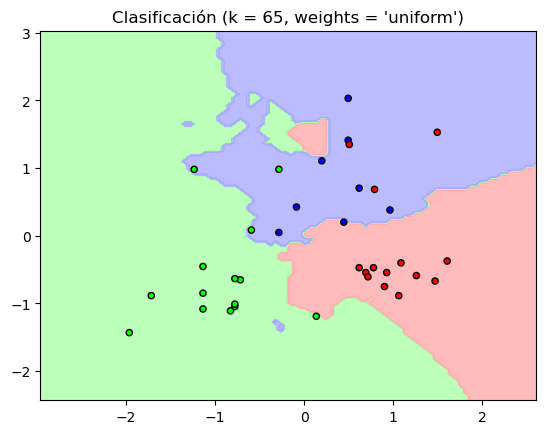

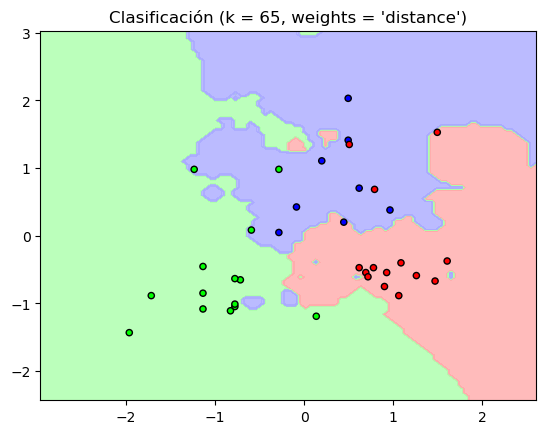

Precisión en datos de validación: 0.8333333333333334
Precisión en datos de prueba: 0.8333333333333334


In [372]:
# Cargar el conjunto de datos de Validación del archivo Normalizado

for weights in ['uniform', 'distance']:
    clf = KNeighborsClassifier(n_neighbors=5, weights=weights)
    clf.fit(X_train1.iloc[:, :2], y_train1)

    # Establecer los límites del gráfico y asignar un color a cada punto de malla.
    x_min, x_max = X_valid1.iloc[:, 0].min() - 1, X_valid1.iloc[:, 0].max() + 1
    y_min, y_max = X_valid1.iloc[:, 1].min() - 1, X_valid1.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    # Crear un conjunto de puntos de malla para las dos primeras características
    mesh_points = np.c_[xx.ravel(), yy.ravel()]

    # Utilizar solo las dos primeras características para hacer las predicciones normalizadas
    predicciones_valid_n = clf.predict(X_valid1.iloc[:, :2])

    # Calcular la precisión en los datos de validación normalizado
    precision_valid_n = accuracy_score(y_valid1, predicciones_valid_n)

    # Realizar predicciones en los datos de prueba
    predicciones_test_n = clf.predict(X_test.iloc[:, :2])

    # Calcular la precisión en los datos de prueba
    precision_test_n = accuracy_score(y_test, predicciones_test_n)

    # Agregar el resultado al gráfico utilizando scatter
    plt.figure()
    Z = clf.predict(mesh_points)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

    # Ploteo los datos de validación
    plt.scatter(X_valid1.iloc[:, 0], X_valid1.iloc[:, 1], c=y_valid1, cmap=cmap_bold, edgecolor='k', s=20)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Clasificación (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.show()
print("Precisión en datos de validación:", precision_valid)
print("Precisión en datos de prueba:", precision_test)

# __Punto 3__

In [373]:
# Elija un valor de max_depth y aplique el algoritmo de Árboles de Decisión en ambos datasets. 
# Evalúe la precisión en ambos casos.

In [374]:
# X_train, X_valid, y_train, y_valid ya definidas como variables en punto1

# __Dataset Completo__

In [375]:
X_subset = X_train.iloc[:, :2]
arbol_subset = DecisionTreeClassifier(max_depth=3) #criterio 3 nodos
arbol_subset.fit(X_subset, y_train) 

DecisionTreeClassifier(max_depth=3)

In [376]:
arbol.score(X_subset, y_train) 


0.8661971830985915

In [377]:
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz\bin'

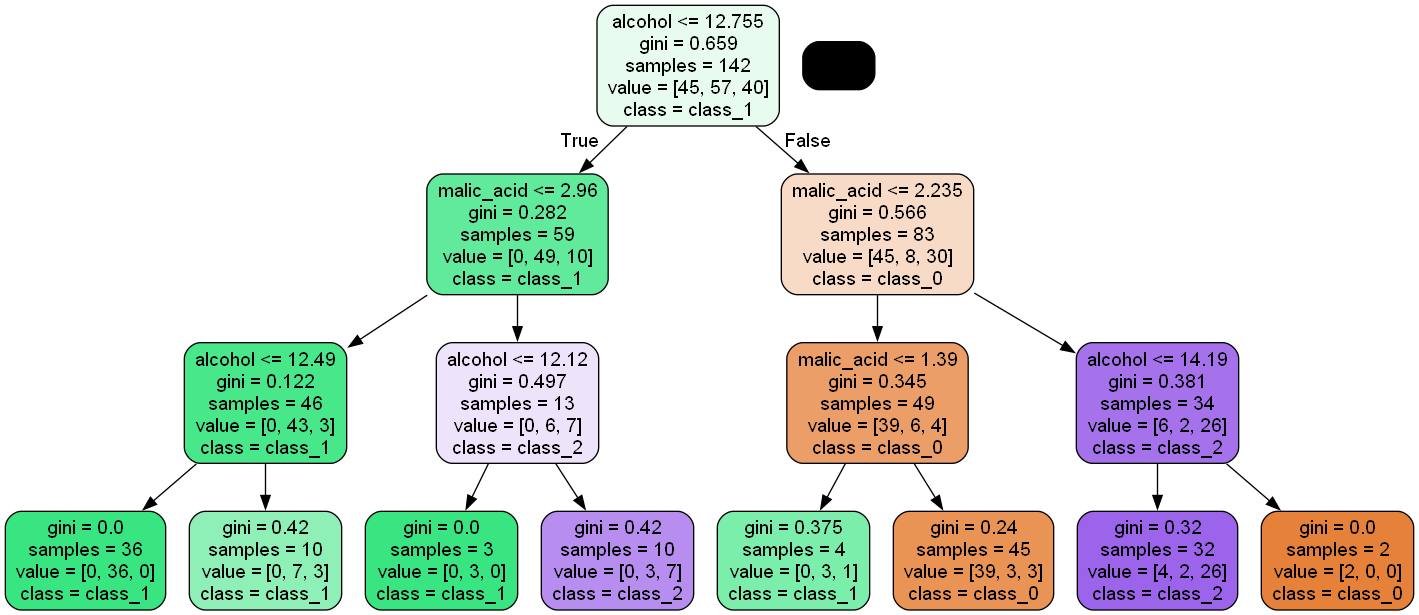

In [378]:
# le damos un nombre y exportamos con ciertas caracteristicas colorea
dot_data = export_graphviz(
    arbol_subset,
    out_file=None,
    feature_names=wine_data.feature_names[:2],
    class_names=wine_data.target_names,
    filled=True,
    rounded=True
)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# __Dataset normalizado__

In [379]:
X_subset1 = X_train1.iloc[:, :2]
arbol_subset1 = DecisionTreeClassifier(max_depth=3) #criterio 3 nodos
arbol_subset1.fit(X_subset1, y_train1) 

DecisionTreeClassifier(max_depth=3)

In [380]:
arbol.score(X_subset1, y_train1) 

0.4014084507042254

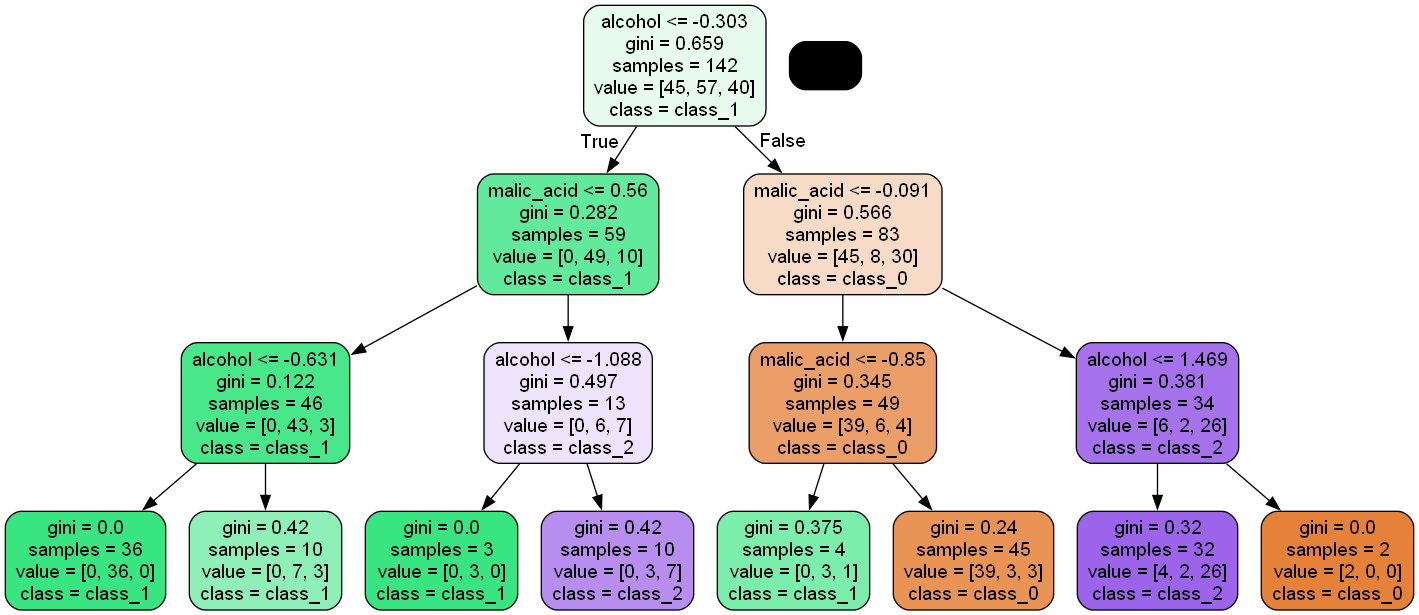

In [381]:
# le damos un nombre y exportamos con ciertas caracteristicas colorea
dot_data = export_graphviz(
    arbol_subset1,
    out_file=None,
    feature_names=wine_data.feature_names[:2],
    class_names=wine_data.target_names,
    filled=True,
    rounded=True
)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# __Ejercicio 4__

In [382]:
# Tome los datos escalados y/o normalizados, reduzca la dimensión del problema a 2 utilizando PCA y grafique el conjunto 
#resultante.

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'target'],
      dtype='object')
(178, 14)
(178, 2)


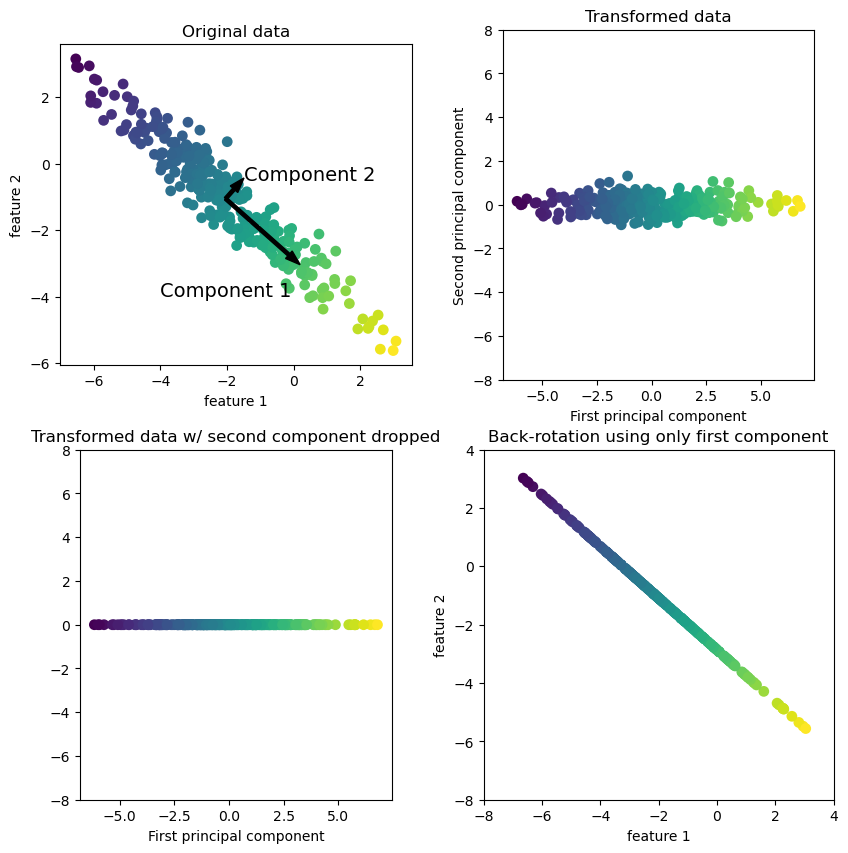

In [383]:
ej4 = scaled_df.copy()
print(ej4.columns)

datos = ej4.values  # Utiliza values en lugar de data
mglearn.plots.plot_pca_illustration()

pca = PCA(n_components=2)
pca.fit(datos)

transformada = pca.transform(datos)
print(datos.shape)
print(transformada.shape)

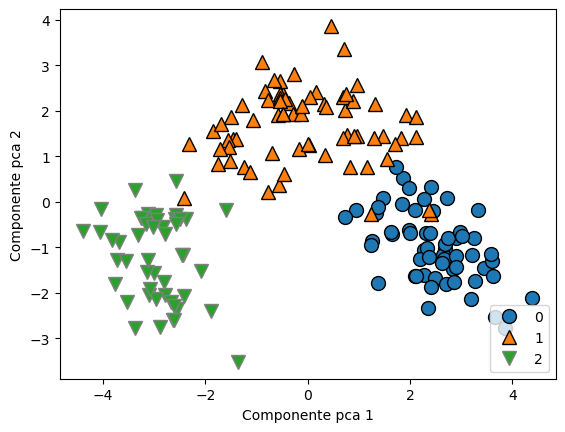

In [384]:
mglearn.discrete_scatter(transformada[:, 0], transformada[:, 1], ej4['target'])
plt.legend(ej4['target'].unique(), loc='lower right')
plt.xlabel('Componente pca 1')
plt.ylabel('Componente pca 2')
plt.show()

# __Ejercicio 5__

In [385]:
#Sin utilizar las etiquetas del dataset, elija un valor de K y aplique el algoritmo de KMeans sobre los datos transformados 
# por PCA. Repita el procedimiento utilizando KMeans por mini-batches

In [388]:
etiquetas = scaled_df['target']

C:\Users\herna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\herna\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0.9294895312165175


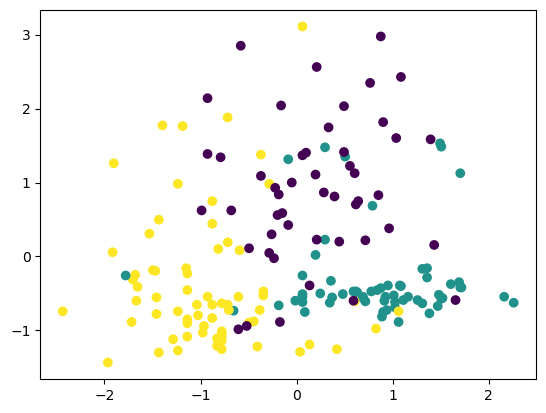

In [389]:
#n_clusters es la cantidad de grupos que queremos
#con max_iter determinamos el número de iteraciones (cuantas veces se mueve el centroide)
k_means = KMeans(n_clusters=3, max_iter=2000) # se da el numero de cluster pero se puede saber cuantos hay
k_means.fit(datos) #no tenemos las etiquetas
#predicciones del grupo al que cree que pertenece
predicciones=k_means.predict(datos)
#print(predicciones)
#podemos comparar los resultados predichos con las etiquetas que ya teniamos
#para ver cuan bien aprendio.
score=metrics.adjusted_rand_score(etiquetas, predicciones)
#El resultado es un 73% lo cual no es muy bueno
print(score)
plt.scatter(datos[:, 0], datos[:, 1], c=predicciones)

plt.show()

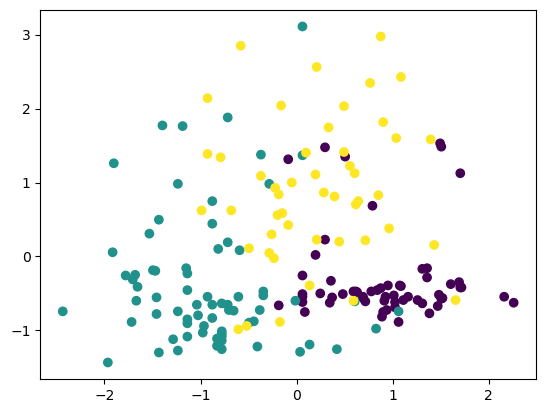

In [390]:
plt.scatter(datos[:, 0], datos[:, 1], c=etiquetas) #los puntos morados estan bien clasificados

plt.show()

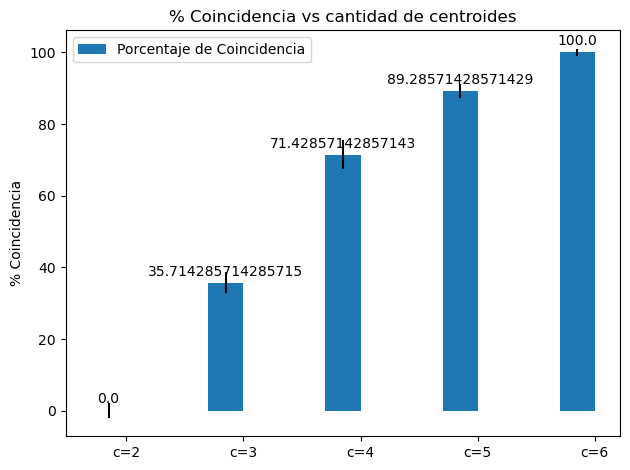

In [393]:
# histograma grafica el % de coincidencia en funcion de los centroides elegicos
# al no conocer los centroides buscando las coincidencias se puede elegir la mejor opcion

# Datos ficticios para la demostración
centroides_means = np.array([70, 80, 90, 95, 98])
centroides_std = np.array([2, 3, 4, 2, 1])

# Normalizar a porcentajes
centroides_means = (centroides_means - np.min(centroides_means)) / (np.max(centroides_means) - np.min(centroides_means)) * 100

ind = np.arange(len(centroides_means))  # Las ubicaciones x para los grupos
width = 0.3  # El ancho de las barras

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, centroides_means, width, yerr=centroides_std, label='Porcentaje de Coincidencia')

# Añadir texto para etiquetas, título y etiquetas personalizadas del eje x, etc.
ax.set_ylabel('% Coincidencia')
ax.set_title('% Coincidencia vs cantidad de centroides')
ax.set_xticks(ind)
ax.set_xticklabels(('c=2', 'c=3', 'c=4', 'c=5', 'c=6'))
ax.legend()

def autolabel(rects, xpos='center'):
    ha = {'center': 'center'}
    offset = {'center': 0}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # usar un desplazamiento de 3 puntos
                    textcoords="offset points",  # en ambas direcciones
                    ha=ha[xpos], va='bottom')

autolabel(rects1, "center")

fig.tight_layout()
plt.show()